# Сборный проект

Нам нужно выявить определяющие успешность игры закономерности для в интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Это позволит ему сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно спрогнозировать продажи на 2017 год по данным 2016-го.

Поэтому в ходе исследования мы предпримем следующие шаги:
- Сделаем обзор данных.
- Проведем предобработку данных: избавимся от неявных дубликатов и пропусков, если такие имеются, подготовим таблицу к  анализу.
- Проведем исследовательский анализ данных: визуализируем данные, определим наиболее популярные игровые платформы и жанры и факторы, на них влияющие.
- Составим портрет пользователя из каждого региона.
- Проверим гипотезы.
- Подведем итоги.

Кроме того, в наши задачи будет входить проверка двух гипотез:
+ Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
+ Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


## Обзор данных <a id='first_step'></a>


Импортируем имющиеся данные в датафрейм и сделаем предварительный обзор.

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='darkgrid', context='notebook', font='sans-serif', font_scale=1)
from datetime import datetime

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

Для удобства обзора данных создадим функцию, которая выведет первые 5 строк датафрейма; выведет информацию о количестве строк и типе данных; выведет описание содержимого таблицы, в том числе сведения о манимальных, максимальных и средних значениях; проанализирует таблицу на предмет пропусков и дубликатов.

In [3]:
def first_look (df: pd.DataFrame):
    '''Функция получения первичной информации о датафрейме'''
    print ('------------- Первые 5 строк ------------')
    display(df.sample(5))
    print('')
    print ('------------- Типы данных ------------')
    df.info()
    print('')
    print ('------------- Описание ------------')
    print('')
    display(df.describe().T)    
    print ('------------- Пропуски ------------')
    count = 0
    shape_0 = df.shape[0]
    for element in df.columns:
        if df[element].isna().sum() > 0: 
            (print(element, ' - ', df[element].isna().sum(), 
                 'пропусков, ', 
                 round(df[element].isna().sum() * 100 / shape_0,2), 
                 '% от числа строк.'))
    count = +1
    if count == 0:
        print('Пропусков НЕТ')
    print('')
    print('')
    print ('------------- Дубликаты ------------')
    if df.duplicated().sum() > 0:
        print('Дубликатов: ', df.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [4]:
first_look (df)

------------- Первые 5 строк ------------


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2821,Ultimate Spider-Man,PS2,2005.0,Action,0.60,0.02,0.00,0.10,74.0,7.9,T
1619,Driv3r,PS2,2004.0,Racing,0.60,0.47,0.00,0.16,57.0,5.5,M
14646,Mahjong Kakutou Club: Zenkoku Taisenban,PS3,2006.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
8395,Densetsu no Stafi 4,DS,2006.0,Platform,0.00,0.00,0.17,0.00,NaN,NaN,NaN
1516,Digimon World,PS,1999.0,Role-Playing,0.56,0.38,0.28,0.08,NaN,NaN,NaN



------------- Типы данных ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

------------- Описание ------------



,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


------------- Пропуски ------------
Name  -  2 пропусков,  0.01 % от числа строк.
Year_of_Release  -  269 пропусков,  1.61 % от числа строк.
Genre  -  2 пропусков,  0.01 % от числа строк.
Critic_Score  -  8578 пропусков,  51.32 % от числа строк.
User_Score  -  6701 пропусков,  40.09 % от числа строк.
Rating  -  6766 пропусков,  40.48 % от числа строк.


------------- Дубликаты ------------
Дубликатов НЕТ


В нашем распоряжении таблица из 11 столбцов и 16715 строк. Данные представлены с 1980 по 2016 годы. Данные за 2016 год могут быть неполными.

Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Для удобства при предобработке приведем наименования столбцов к нижнему регистру.

В целях проведения расчетов и визуализации данных приведем данные в `Year_of_Release`, `Critic_Score` к типам данных `Int64`, а `User_Score` к `float64`.
В таблице в столбцах `Name`, `Year_of_Release`, `Genre` незначительное количество пропусоков, которые могут быть удалены без вреда для исследования. 
Пропуски `Critic_Score`, `User_Score`, `Rating` занимают значительную долю данных. Данные в этих столбцах являют собой строго установленные либо присвоенные величины, поэтому удалять либо заполнять пропуски в этих столбцах мы не будем.
Таблица не имеет явных дубликатов, однако в ходе исследования возможно нам придется найти и удалить неявные дубликаты.

Также из описания видно, что максимальные значения продаж сильно превышают значения третей квартили по каждому региону. Видимо, ряд наиболее популярных игр создали такой выброс данных, когда продажи нескольких игр превысили продажи всех остальных в десятки раз. Однако на этапе предобработки мы не будем избавляться от этих выборосов, но отфильтруем их при необходимости.

**Выводы**

Исходя из целей исследования для ответов на вопросы нам необходимы будут данные всех столбцов, содержащихся в таблице.

По итогам первичного обзора датафреймов перед непосредственным анализом нам предстоит обработать данные, а именно:   


1. Привести данные к нужному нам типу.
2. Переименовать столбцы таблицы.
3. Обработать пропуски в данных.
4. Выявить и удалить неявные дубликаты и аномалии.

## Предобработка данных <a id='second_step'></a>

### Изменение типа данных, удаление пропусков.

Для начала изменим названия столбцов: приведём к нижнему регистру.

In [5]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Обработаем пропуски и предположим возможные причины их появления.

Как мы указали выше, в столбцах `Name`, `Year_of_Release`, `Genre` процент пропусков низкий, всего 2 строки -  0.01 %, 269 строк - 1.61 % и 2 строки - 0.01 % соответственно. 

Проверим совпадают ли пропуски в столбцах с названием игры и жанром:

In [6]:
df[df['name'].isna() & df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в названии и жанре игры совпадают, и относятся к играм 1993 года. В выведенных строках с пропусками также отсутствует информация об оценках критиков и пользователей и возрастном рейтинге игры. Мы можем удалить эти две строки без ущерба исследованию.

Как видно из выведенной таблицы с пропусками в столбце `Year_of_Release`, часть из игр содержат год выпуска в названии. 

Возможно, поэтому год не был дополнительно указан в соответствующей графе. Мы не будем извлекать год из названия и пытаться заполнить пропуски - ввиду малого количества пропусков, мы можем удалить 269 строк.


In [8]:
df = df.dropna(subset=['name','genre','year_of_release']).reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

В нашем распоряжении остались пропуски в столбцах `Critic_Score` - 8578 пропусков,  51.32 %, `User_Score` - 6701 пропусков,  40.09 %, `Rating` - 6766 пропусков,  40.48 %.

__В указанных столбцах могут присутствовать пропуски по ряду причин:__
> 1. На дату выхода указанных игр не существовали используемые в таблицы системы оценки или присвоения рейтинга.
> 2. На момет выгрузки данных игры еще не оценены либо им играм еще не присвоен рейтинг.
> 3. В регионе выхода игры используется иная система оценки или иная система возрастных рейтингов, поэтому соответствующие данные не подгрузились в датафрейм.

__Преобразуем данные в нужные типы.__

Мы решили изменить типы данных в столбцах `User_Score`,`Year_of_Release`, `Critic_Score`.

Сейчас `User_Score` имеет тип данных `object`. Проверим уникальные значения столбца.

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди численных обозначений присутствует буквенное - `tbd`.

In [10]:
df[df['user_score']=='tbd']['name'].count()

2376

Аббревиатура `tbd` в данном случае расшифровывается как To Be Determined, то есть "Будет определено". Значит на дату выгрузки данных оценка пользователей не определена, а по факту - отсутствует. Заменим буквенные обозначения пропусками.

In [11]:
df['user_score']= df['user_score'].replace('tbd', np.nan)
round(df['user_score'].isna().mean()*100,1)

54.6

Процент пропусков в оценках пользователей увеличился, однако теперь мы без препятствий можем заменить тип данных во всех нужных нам столбцах. Воспользуемся методом `Int64`, чтобы не обращать внимания на пропуски и не ставить заглушки.

In [12]:
df['critic_score'] = df['critic_score'].astype('Int64')
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = df['user_score'].astype('float64')
df.shape

(16444, 11)

Нам удалось избавить от пропусков и заменить типы данных без потери значительного объема информации.

### Добавление данных. Избавление от неявных дубликатов.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [13]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis='columns')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


В начале нашего исследования мы поставили целью проверить датафрейм на предмет неявных дубликатов. Проверим столбцы с категориальной составляющей.

In [14]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.

Рейтинги указанной сисемы составляют следующий список:

__«EC» («Early childhood») — «Для детей младшего возраста»__: Игра подходит для детей от 3 лет     
__«E» («Everyone») — «Для всех»__: Содержание вполне подходит для возрастной категории от 6 лет. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")  
__«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»__: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.  
__«T» («Teen») — «Подросткам»__: Игра подходит для лиц от 13 лет.   
__«M» («Mature») — «Для взрослых»__: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.   
__«AO» («Adults Only 18+») — «Только для взрослых»__: Содержание игры только для взрослых старше 18 лет. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Первой игрой, которая получила данный рейтинг, стала The Joy of Sex, выпущенная в 1993 году.  
__«RP» («Rating Pending») — «Рейтинг ожидается»__: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.  

Как видим, по факту `RP` для рейтинга означает то же самое, что и `tbd` для пользовательских оценок. Заменим указанный рейтинг на пропуски.

In [15]:
df[df['rating']== 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14045,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63,6.8,RP,0.04


In [16]:
df['rating']= df['rating'].replace('RP', np.nan)

Из описания следует, что рейтинги `K-A` и `E` совпадают по смыслу - для возрастной категории от 6 лет, но относятся к разным временным отрезкам. Для удобства объединим эти рейтинги в одну категорию.

In [17]:
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

Теперь после предобработки заменим пропуски на заглушку `unknown`.

Потому что ESRB - система оценок, принятая в США и Канаде. В различных странах/регионах могут быть приняты свои системы оценок с иной возрастной градацией, в нашем случае:  в Японии - это CERO, в Европе - PEGI. 

Предоставленные нам данные не содержат пояснений, были ли распределены рейтинги в Европе и Японии в соответствии ESRB, но, учитывая, количество пропусков в столбце `rating`, ответ отрицательный. 

In [18]:
df['rating'] = df['rating'].fillna('unknown')

Аналогичным образом проверим столбец с жанрами игр.

In [19]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Отлично, здесь неявных дубликатов нет, значения жанров исчерпывающие.

**Вывод**

Итак, на этапе предобработки мы:
- исправили типы данных;
- избавились от пропусков;
- рассчитали суммарные продажи по всем регионам;
- избавились от неявных дубликатов.

Теперь можем переходить к непосредственному анализу.

## Исследовательский анализ данных<a id='third_step'></a>

### Обзор продаж игр и популярности игровых платформ.

Посмотрим, сколько игр выпускалось в разные годы. 


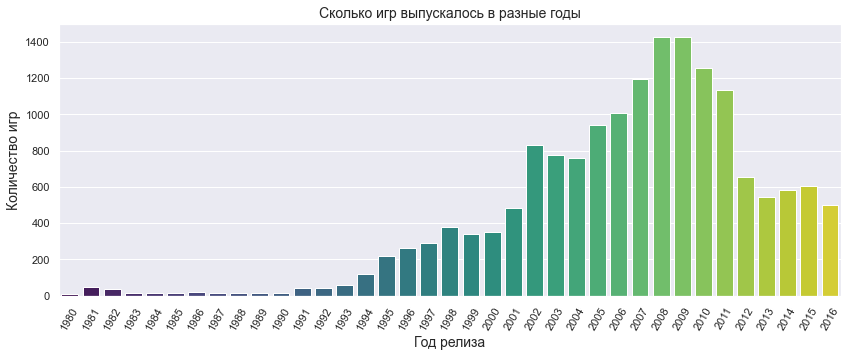

In [20]:
data = df.pivot_table(index='year_of_release',
                      values='name', 
                      aggfunc=('count')).reset_index()
plt.figure(figsize=(14, 5))
g = sns.barplot(data = data, x = 'year_of_release', y='name', palette = 'viridis')
g.axes.set_title('Сколько игр выпускалось в разные годы', fontsize=14)
g.set_ylabel('Количество игр', fontsize=14)
g.set_xlabel('Год релиза', fontsize=14)
plt.xticks(rotation=60);

На закате прошлого века индустрия игр еще развивалась, продажи росли постепенно и стали превышать значение в 200 млн. копий только в 1995 году. Значительный рывок в продаже игр произошел в 2002 году. 

Однако после подъема продаж в 00-х, второе десятилетие 21-го века ознаменовалось спадом продаж практически до уровня 90-х гг. Это может быть связано с ростом популярности мобильных игр и пиратством.

Посмотрим распределение продаж игр по каждой действовавшей за исследуемый отрезок времени платформе.

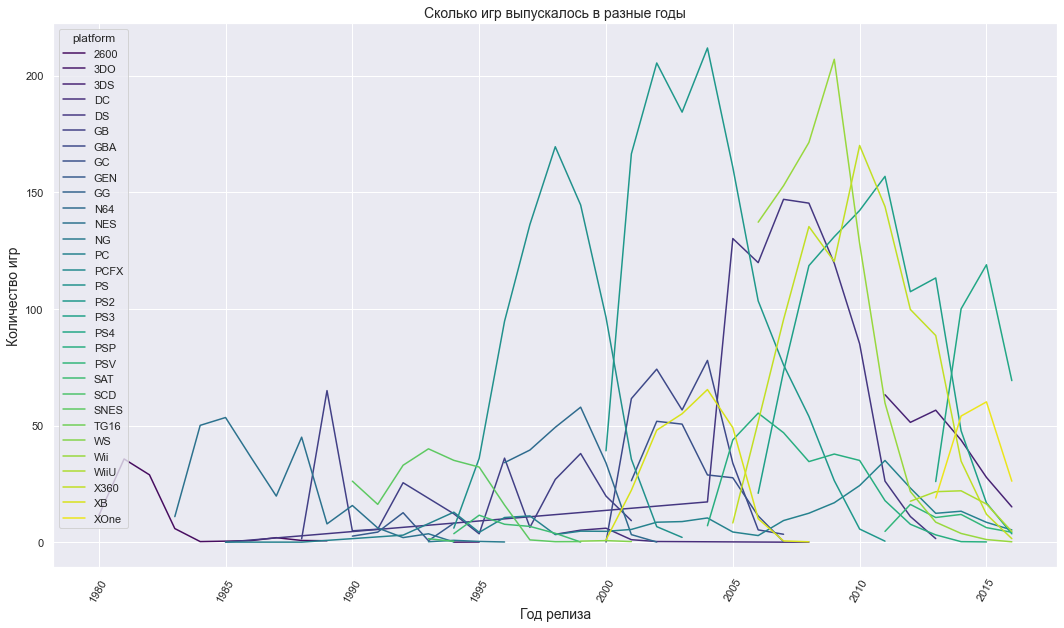

In [21]:
df_top_total = df.pivot_table(index=['platform', 'year_of_release'], 
                              values ='total_sales', 
                              aggfunc=('sum')).reset_index()
plt.figure(figsize=(18, 10))
g = sns.lineplot(data = df_top_total, 
                 x = 'year_of_release', 
                 y='total_sales', 
                 hue='platform', 
                 palette = 'viridis')
g.axes.set_title('Сколько игр выпускалось в разные годы', fontsize=14)
g.set_ylabel('Количество игр', fontsize=14)
g.set_xlabel('Год релиза', fontsize=14)
plt.xticks(rotation=60);

Прежде всего из графика видны аномалии в данных в отношении платформ `DS` и `X360` - графики 

Nintendo DS  — следующее поколение карманных игровых консолей компании Nintendo после Game Boy Advance SP. Консоль была выпущена в 2004 году в Канаде, США и Японии.

Xbox 360 — вторая по счёту игровая приставка компании Microsoft, которая последовала за Xbox. Выпущена в 2005 году.

Обрежем время действия указанных платформ до реального.

In [22]:
df[df['platform'] == 'DS'] = df[df['year_of_release'] >= 2004]
df[df['platform'] == 'X360'] = df[df['year_of_release'] >= 2005]

Теперь посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.


In [23]:
top = (df.pivot_table(index='platform',
               values ='total_sales', 
               aggfunc=('sum'))
 .sort_values(by='total_sales', 
              ascending=False).
 head(10)
)
top

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


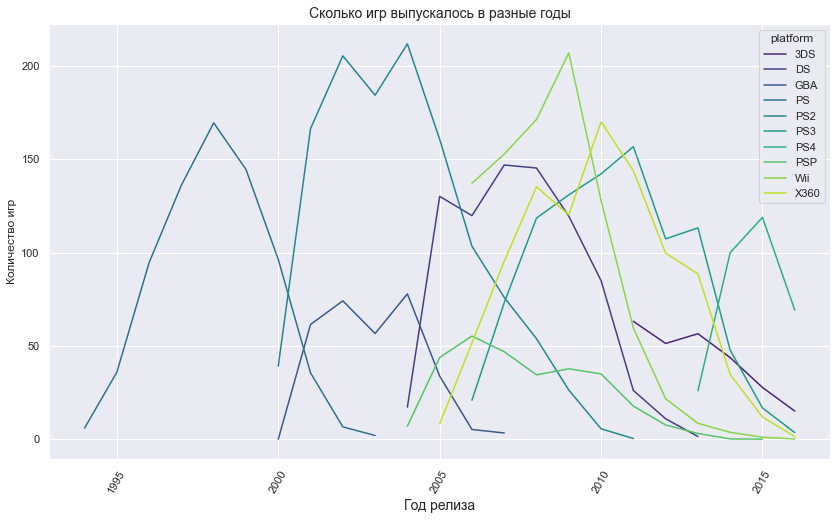

In [24]:
df_top = df.query('platform in @top.index').pivot_table(index=['platform', 'year_of_release'], 
                                                         values ='total_sales', 
                                                         aggfunc=('sum')).reset_index()
plt.figure(figsize=(14, 8))
g=sns.lineplot(data = df_top, x = 'year_of_release', y='total_sales', hue='platform', palette = 'viridis')
g.axes.set_title('Сколько игр выпускалось в разные годы', fontsize=14)
g.set_ylabel('Количество игр')
g.set_xlabel('Год релиза', fontsize=14)
plt.xticks(rotation=60);

Из графика видно, что топовые платформы "живут" от 5-ти до 10-ти лет. Чтобы быть более точными, рассчитаем среднее и медианное время действия наиболее популярных игровых платформ:

In [25]:
dfdf= df.pivot_table(index='platform', values ='year_of_release', aggfunc=('min','max')).reset_index()
dfdf['total'] = dfdf['max'] - dfdf['min']
print(f"Медианное время жизни платформы: {int(dfdf['total'].median())} лет.")
print(f"Среднее время жизни платформы: {int(dfdf['total'].mean())} лет.")

Медианное время жизни платформы: 6 лет.
Среднее время жизни платформы: 7 лет.


### Определение актуального периода исследования.

Несмотря на довольно длительный срок действия популярных игровых платформ, из графика выше мы знаем, что наибольший временной срок действия у платформ был в начале 2000-х. Возможно это связанно с отсутствием жесткой конкуренции.

Но чем ближе график к настоящему времени, тем короче жизнь платформы и больше популярных конкурентов.

Поэтому, а также с учетом спада игровой индустрии во втором десятилетии 21 века, в актуальный период мы возьмем отрезок времени с 2013 до 2016 годов.

In [26]:
games=df[df['year_of_release'] >= 2013]
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11981,Transformer: Rise of the Dark Spark (3DS),3DS,2014,Role-Playing,0.05,0.01,0.00,0.01,<NA>,NaN,unknown,0.07
2877,Call of Duty: Ghosts,PC,2013,Shooter,0.23,0.41,0.00,0.05,<NA>,NaN,unknown,0.69
15923,Higurashi no Naku Koro ni Iki,PS3,2015,Action,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
7885,Just Dance 2017,Wii,2016,Misc,0.06,0.11,0.00,0.01,<NA>,NaN,E10+,0.18
12833,Sherlock Holmes: Crimes & Punishments,X360,2014,Adventure,0.03,0.02,0.00,0.00,<NA>,NaN,unknown,0.05


Далее в нашем исследовании мы будем использовать только данных за актуальный период.

Снова составим топ наиболее популярных платформ в актуальном периоде.

In [27]:
games_top = (games.pivot_table(index='platform',
               values ='total_sales', 
               aggfunc=('sum'))
             .sort_values(by='total_sales', 
                          ascending=False).
             head(10)
            )
games_top

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Определим, какие платформы лидируют по продажам, растут они или падают. Выберем несколько потенциально прибыльных платформ.


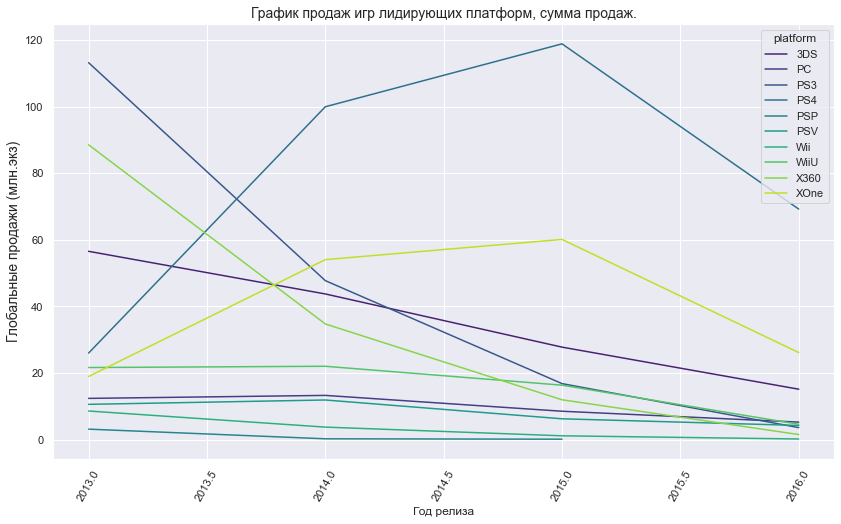

In [28]:
games_top = (games.query('platform in @games_top.index').pivot_table(index=['platform', 'year_of_release'], 
                                                         values ='total_sales', 
                                                         aggfunc=('sum','median')).reset_index())
plt.figure(figsize=(14, 8))
g=sns.lineplot(data = games_top, x = 'year_of_release', y='sum', hue='platform', palette = 'viridis')
g.axes.set_title('График продаж игр лидирующих платформ, сумма продаж.', fontsize=14)
g.set_ylabel('Глобальные продажи (млн.экз)', fontsize=14)
g.set_xlabel('Год релиза')
plt.xticks(rotation=60);

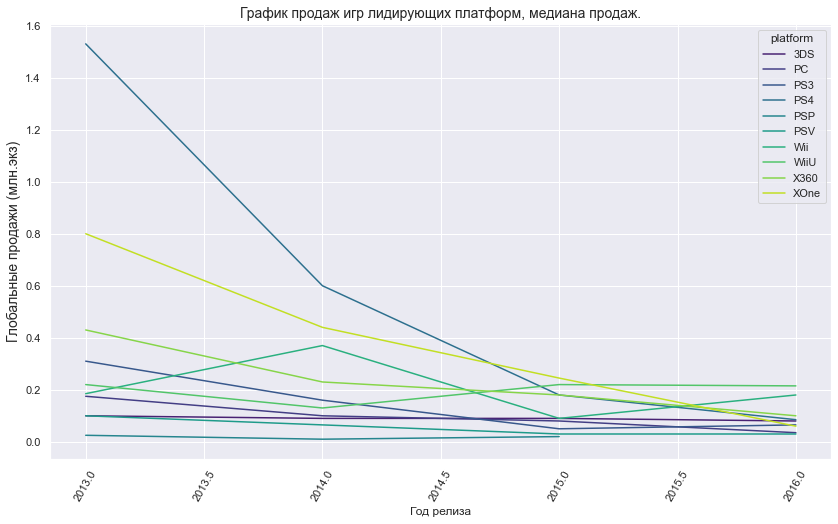

In [29]:
plt.figure(figsize=(14, 8))
g=sns.lineplot(data = games_top, x = 'year_of_release', y='median', hue='platform', palette = 'viridis')
g.axes.set_title('График продаж игр лидирующих платформ, медиана продаж.', fontsize=14)
g.set_ylabel('Глобальные продажи (млн.экз)', fontsize=14)
g.set_xlabel('Год релиза')
plt.xticks(rotation=60);

За период 2013-2016 гг. только две платформы - `PS4` и `XOne` -  показали рост продаж. Однако, исходя из графика медиан, рост продаж в двух этих платформах обусловлен  всплесками продаж ряда отдельных наиболее популярных игр.

Снижение графиков к окончанию исследовательского периода не показательно из-за неполноты данных за 2016 год, которые вполне могут не содержать весь объем информации о продажах игр за год.

Перед тем, как мы перейдем к исследованию распределения глобальных продаж, посмотрим, что это за флагманы, обеспечившие `PS4` и `XOne` такие высокие показатели в 2013-2015 гг.

In [30]:
(games.query('platform in @games_top.platform and platform == ["PS4", "XOne"] and total_sales > 5')
 .sort_values(by='year_of_release'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76,6.1,T,5.64
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,unknown,7.98
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,unknown,7.39


Высокие продажи на топе платформ были обеспечены:
- 2014 год: играми GTA V, Call of Duty: Advanced Warfare, FIFA 15.
- 2015 год: Call of Duty: Black Ops 3, FIFA 16, Star Wars Battlefront (2015).
- 2016 год: FIFA 17, Uncharted 4: A Thief's End. 

Жанры: Shooter, Action и Sports.

### Распределение глобальных продаж.

Чтобы рассмотреть глобальные продажи игр в разбивке по платформам построим графики «ящик с усами» для:
- Топа-10 платформ в период 2013-2016 гг. по общим продажам за каждую игру.
- Топа-10 платформ в период 2013-2016 гг. по общим продажам за каждую игру без учета выбросов.


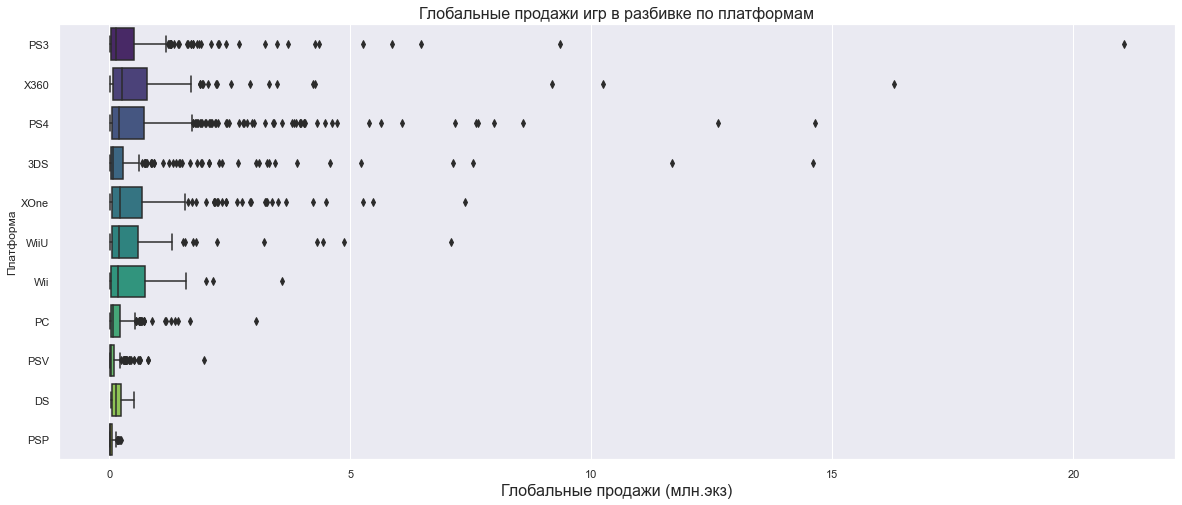

In [31]:
games_topgame = games.query('platform in @games_top.platform')
plt.figure(figsize=(20, 8))
g=sns.boxplot(data = games,
              x = 'total_sales',
              y='platform',
              palette = 'viridis',
              orient='h')
g.axes.set_title('Глобальные продажи игр в разбивке по платформам', fontsize=16)
g.set_ylabel('Платформа')
g.set_xlabel('Глобальные продажи (млн.экз)', fontsize=16);

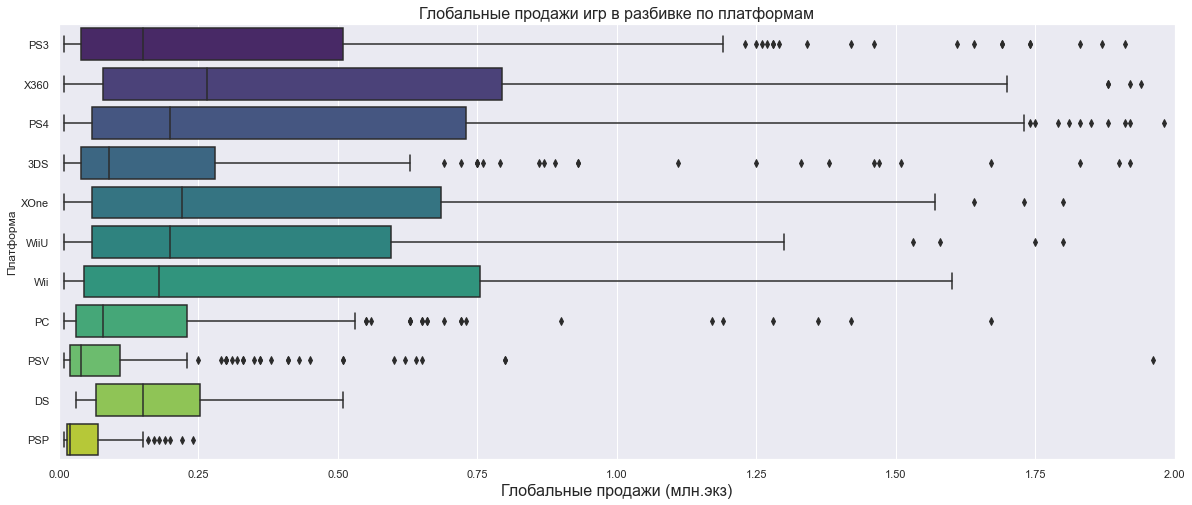

In [32]:
games_topgame = games.query('platform in @games_top.platform')
plt.figure(figsize=(20, 8))
g=sns.boxplot(data = games,
              x = 'total_sales',
              y='platform',
              palette = 'viridis',
              orient='h')
g.axes.set_title('Глобальные продажи игр в разбивке по платформам', fontsize=16)
g.set_ylabel('Платформа')
g.set_xlabel('Глобальные продажи (млн.экз)', fontsize=16)
plt.xlim(0,2);

Выведем игры, чьи продажи в 2013-2016 гг. составили более 10 млн. экземпляров.

In [33]:
games.query('platform in @games_top.platform and platform == ["PS3", "PS4", "3DS", "X360"] and total_sales > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24


__Вывод__

Лидером по медианному количеству продаж, в том числе среди бестселлеров, является платформа `PS3`. Также стабильные высокие продажи  показывают платформы `PS4` и `X360`. 

Между тем, лидеры по медианам и третьим квартилям продаж - это `X360`, `PS4`, `XOne` и `WiiU`. Указанные платформы стабильно приносят высокий доход.

### Влияние оценок пользователей  и критиков на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Для этого построим матрицу корреляций и посчитаем корреляцию между отзывами и продажами для пяти наиболее популярных платформ.

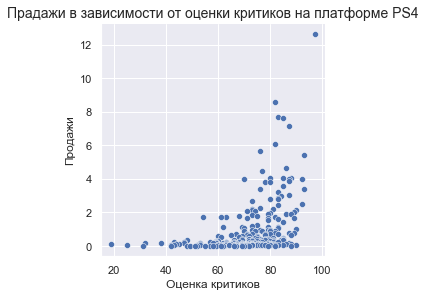

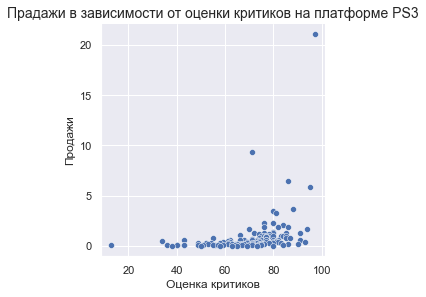

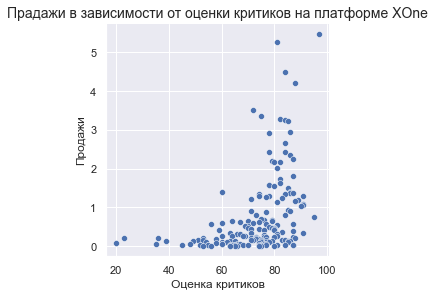

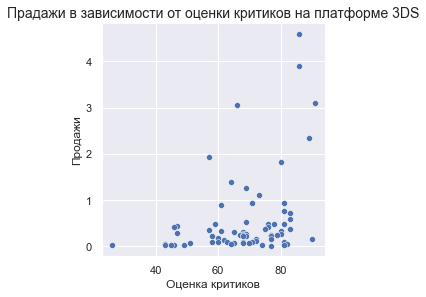

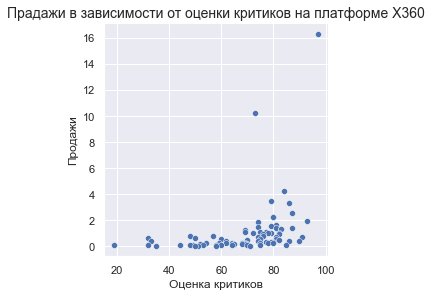

In [34]:
games_notna = games[games['critic_score'].notna()]
for item in ['PS4','PS3', 'XOne', '3DS', 'X360']:
    corr_df = games_notna[games_notna['platform'] == item]
    g = sns.PairGrid(data=corr_df,
                 x_vars=['critic_score'],
                 y_vars=['total_sales'],
                 height=4)
    g.map(sns.scatterplot)
    plt.title(f'Прадажи в зависимости от оценки критиков на платформе {item}', fontsize=14)
    g.set(ylabel = 'Продажи', xlabel = 'Оценка критиков');

> Из графиков следует, что между глобальными продажами и оценкой критиков прослеживается некая корреляция. При этом ее уровень ниже на платформах `3DS` и `X360`, что, однако, может обусловлено быть более низким количестве продаж.

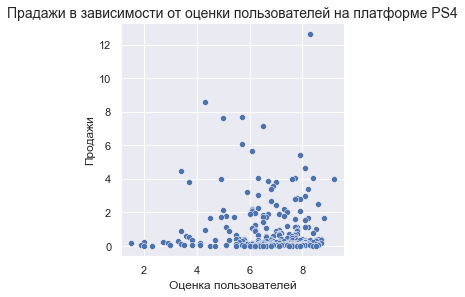

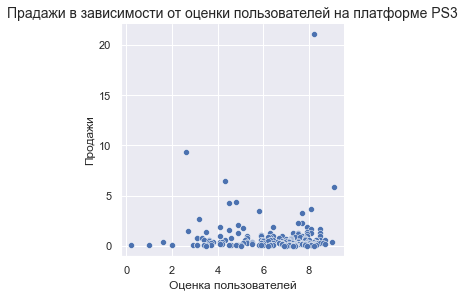

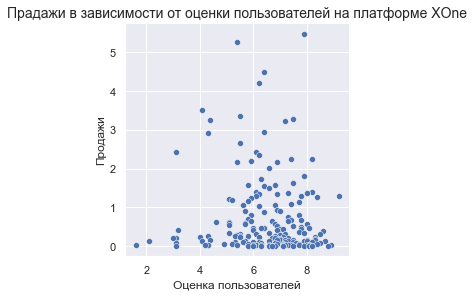

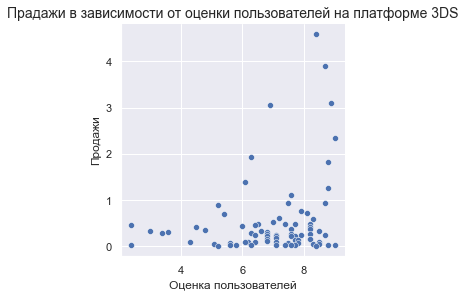

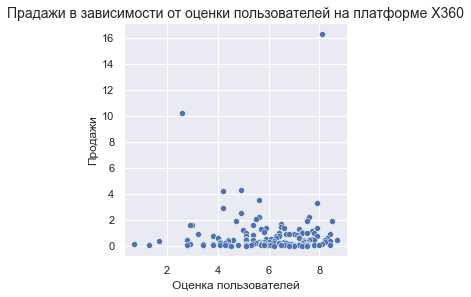

In [35]:
games_notna = games[games['user_score'].notna()]
for item in ['PS4','PS3', 'XOne', '3DS', 'X360']:
    corr_df = games_notna[games_notna['platform'] == item]
    g = sns.PairGrid(data=corr_df,
                 x_vars=['user_score'],
                 y_vars=['total_sales'],
                 height=4)
    g.map(sns.scatterplot)
    plt.title(f'Прадажи в зависимости от оценки пользователей на платформе {item}', fontsize=14)
    g.set(ylabel = 'Продажи', xlabel = 'Оценка пользователей');

> Точки на графиках корреляции продаж и пользовательский оценок более разрознены - что говорит о более низкой корреляции. Наиболее выраженная корреляциия у `3DS`.

In [36]:
for item in ['PS4','PS3', 'XOne', '3DS', 'X360']:
    corr_df = games[games['platform'] == item]
    print(f'__________Таблица корреляций для {item}__________')
    display(corr_df[['platform','total_sales','critic_score','user_score']].corr())

__________Таблица корреляций для PS4__________


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


__________Таблица корреляций для PS3__________


,total_sales,critic_score,user_score
total_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


__________Таблица корреляций для XOne__________


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


__________Таблица корреляций для 3DS__________


,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


__________Таблица корреляций для X360__________


,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


В целом, наши выводы, сделанные из графиков, подтвердились.

Между глобальными продажами и оценкой критиков имеется умеренная положительная корреляция - 30-40%, а между продажами и оценкой пользователей корелляция практически отсутствует. Наибольший уровень корреляции между продажами и пользовательской оценкой у Нинтендо - 24% -  все еще слабый показатель. 

Примечательна высокая корреляция между оценкой критиков и оценкой пользователей.

__Вывод__

Для пяти наиболее популярных платформ справедливы следующие выводы:
- Между  глобальными продажами и оценкой критиков имеется умеренная положительная корреляция. 
- Между продажами и оценкой пользователей корреляция практически отсутствует.
- Примечательна высокая корреляция между оценкой критиков и оценкой пользователей.


### Распределение игр по жанрам.

Посмотрим на общее распределение игр по жанрам. Выделим самые прибыльные жанры и жанры с низкими продажами.


Построим график размаха для глобальных продаж. 

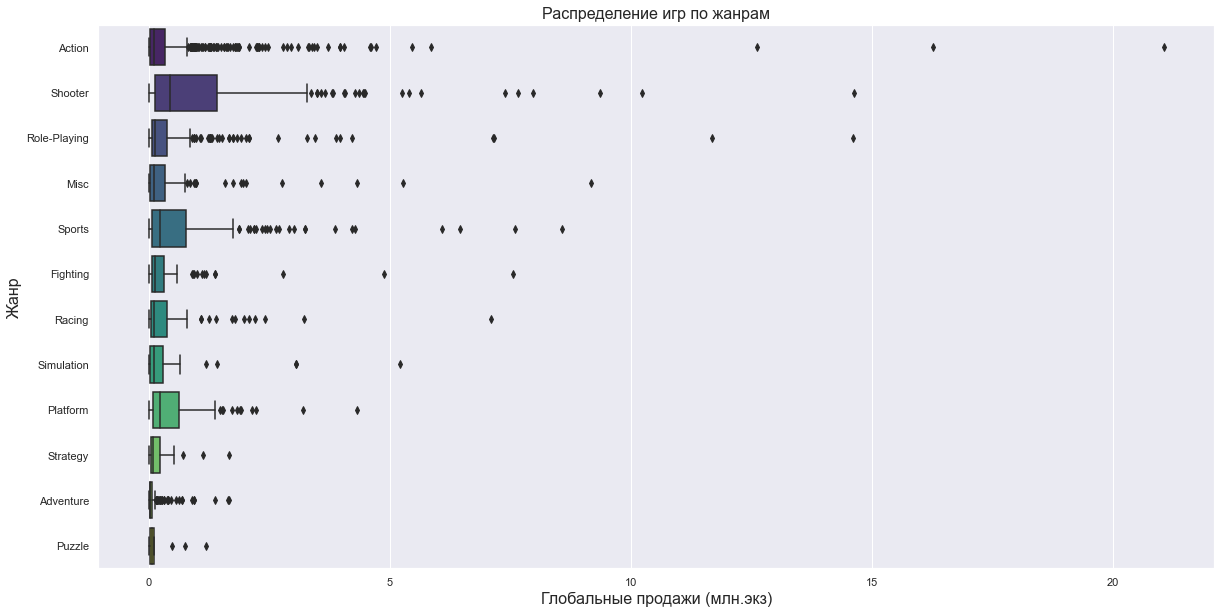

In [37]:
plt.figure(figsize=(20, 10))
g = sns.boxplot(data = games, 
            x = 'total_sales', 
            y='genre',
            palette = 'viridis',
            orient='h')
g.axes.set_title('Распределение игр по жанрам', fontsize=16)
g.set_ylabel('Жанр', fontsize=16)
g.set_xlabel('Глобальные продажи (млн.экз)', fontsize=16);

Для того, чтобы лучше рассмотреть медианы и квартили боксплотов, масштабируем график, установив границы глобальных продаж от 0 до 5 (млн.экз)

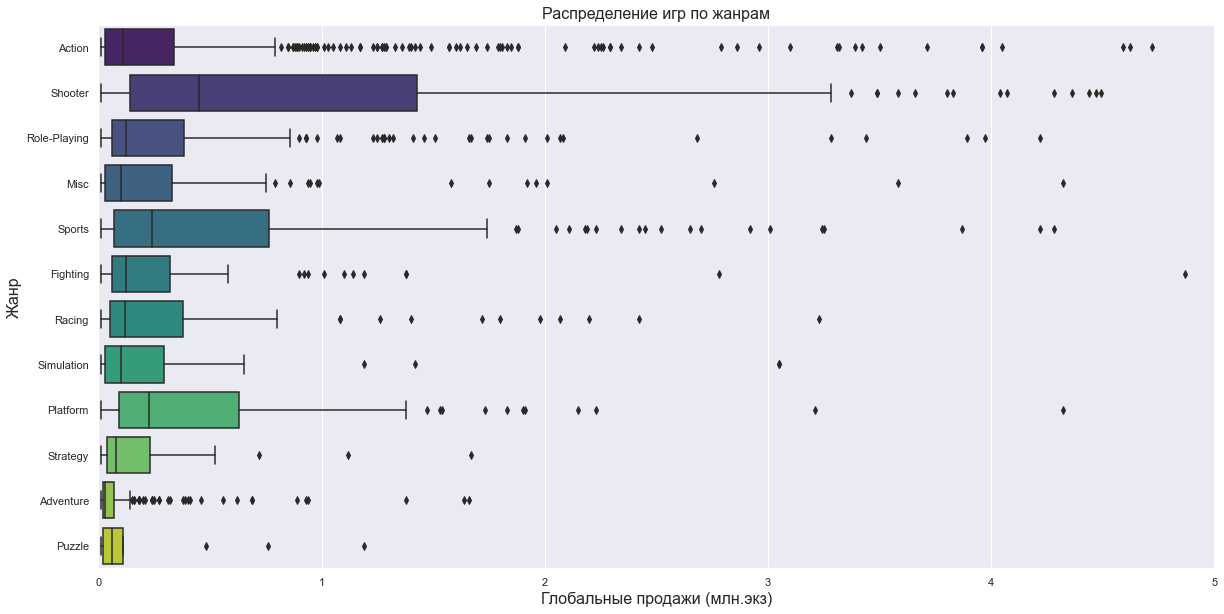

In [38]:
plt.figure(figsize=(20, 10))
g = sns.boxplot(data = games, 
            x = 'total_sales', 
            y='genre',
            palette = 'viridis',
            orient='h')
g.axes.set_title('Распределение игр по жанрам', fontsize=16)
g.set_ylabel('Жанр', fontsize=16)
g.set_xlabel('Глобальные продажи (млн.экз)', fontsize=16)
plt.xlim(0,5);

__Вывод__

Наибольшей популярностью - с превосходящими конкурентов пиком продаж - пользуется жанр `Action`, успех которого в исследованном периоде обеспечен бестселлером `GTA V`. 

Второе и третье места по продажам занимают жанры `Shooter` и `Role-Playing`. Возможно, последние 3 года до даты прогноза эти жанры набирают популярность. 

`Shooter`, в числе прочего, является наиболее стабильным по продажам жанром - этот жанр имеет наиболее высокие показатели медианы и третьего квартиля продаж. 

Следует обратить внимание на жанр `Sports`. Несмотря на то, что основная масса продаж ниже, на графике видны многочисленные точечные вспышки продаж, как мы уже знаем, обеспеченные выходом игр серии `FIFA`. 

Наименьшим спросом и стабильностью пользуются жанры `Adventure` и `Puzzle` - являющиеся цифровыми аналогами настольных игр, вновь набирающих популярность и оттого вытесняющих цифрового соперника.


## Составление портрета пользователя каждого  региона<a id='forth_step'></a>

### Топ-5 платформ для каждого региона.

Определим самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP).

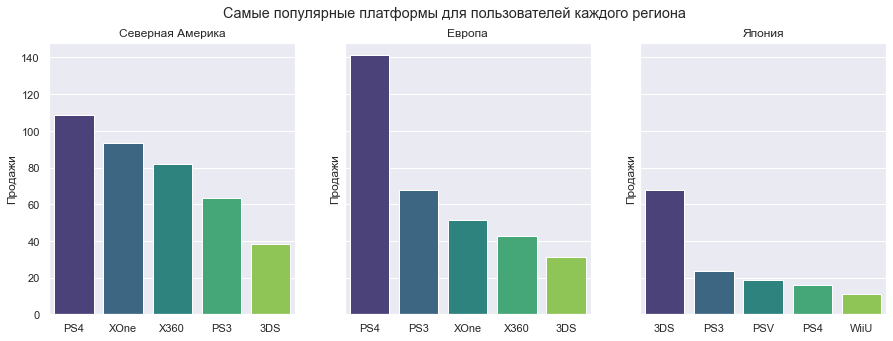

In [39]:
ax = {'na_sales':0,'eu_sales':1, 'jp_sales':2}
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Самые популярные платформы для пользователей каждого региона')
title = {'na_sales':'Северная Америка','eu_sales':'Европа', 'jp_sales':'Япония'}
for sales in ['na_sales','eu_sales','jp_sales']:
    g_region = games.pivot_table(index='platform',
               values = sales, 
               aggfunc=('sum')).sort_values(by=sales,ascending=False).reset_index().head()
    sns.barplot(ax=axes[ax[sales]], data=g_region, x='platform', y=sales, palette = 'viridis')
    axes[ax[sales]].set(title = title[sales], ylabel = 'Продажи', xlabel = None);

Теперь, выявив топ-5 наиболее популярных платформ, определим долю этих платформ в соотношении друг с другом и иными платформами, не попавшими в топ.

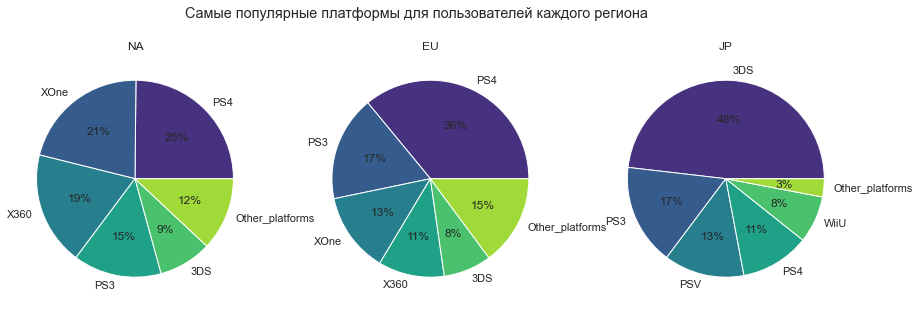

In [40]:
regions = games.columns[4:7]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Самые популярные платформы для пользователей каждого региона')
for i in range(3):
    colors = sns.color_palette('viridis')
    g_region = (games.groupby('platform')[regions[i]].sum().
                reset_index().
                sort_values(regions[i], ascending = False, ignore_index=True).
               head(5))
    g_region = (g_region.append({'platform':'Other_platforms', 
                                 regions[i]:games[regions[i]].sum() - g_region[regions[i]].sum()},
                               ignore_index=True))
    plt.axes(axes[i])
    plt.pie(data=g_region, x=g_region[regions[i]], labels = 'platform', colors = colors, autopct='%.0f%%')
    axes[i].set_title(g_region.columns[1].split('_')[0].upper())
plt.show()

__Вывод__

Лидером продаж среди платформ в Северной Америке и Европе (с большим отрывом) является `PS4` - 25% в Америке и 36% в Европе. Япония отдает предпочтение стабильному `3DS` - также с большим отрывом 48%.

Дальнейшее распределение популярности платформ между регионами различается.
- В Америке популярны `XOne` и `X360` - 21% и 19% соответственно.
- В Европе спросом пользуются `PS3` и `XOne` - 17% и 13% соответственно.
- В Японии популярны `PS3` и `PSV`- 17% и 13% соответственно.

### Топ-5  жанров для каждого региона.

Определим самые популярные жанры (топ-5) среди пользователей каждого региона.

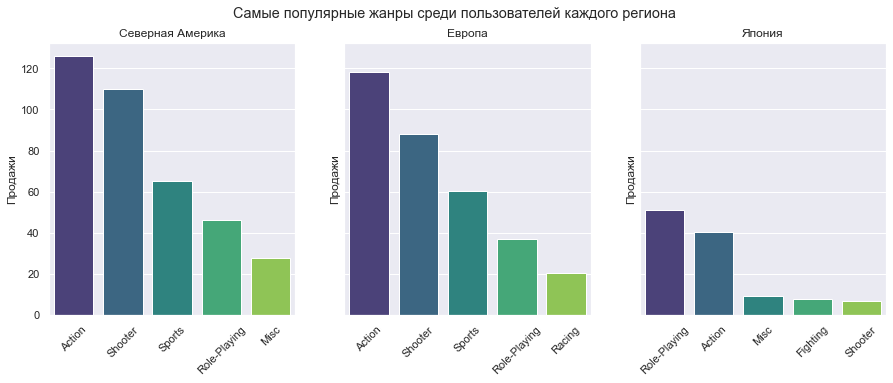

In [41]:
ax = {'na_sales':0,'eu_sales':1, 'jp_sales':2}
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Самые популярные жанры среди пользователей каждого региона')
title = {'na_sales':'Северная Америка','eu_sales':'Европа', 'jp_sales':'Япония'}
for sales in ['na_sales','eu_sales','jp_sales']:
    g_region = (games.pivot_table(index='genre',
                values = sales, 
                aggfunc=('sum')).sort_values(by=sales, ascending=False).reset_index().head())
    sns.barplot(ax=axes[ax[sales]], data=g_region, x='genre', y=sales, palette = 'viridis')
    axes[ax[sales]].set(title = title[sales], ylabel = 'Продажи', xlabel = None);
    axes[ax[sales]].set_xticklabels(axes[ax[sales]].get_xticklabels(),rotation = 45);

Теперь, выявив топ-5 наиболее популярных жанров, определим долю игр этих жанров в соотношении друг с другом и иными жанрами, не попавшими в топ.

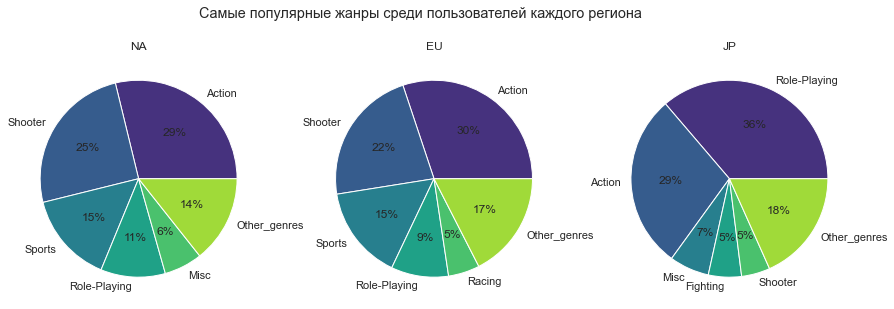

In [42]:
regions = games.columns[4:7]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Самые популярные жанры среди пользователей каждого региона')
for i in range(3):
    colors = sns.color_palette('viridis')
    g_region = (games.groupby('genre')[regions[i]].sum().
                reset_index().
                sort_values(regions[i], ascending = False, ignore_index=True).
               head(5))
    g_region = (g_region.append({'genre':'Other_genres', 
                                 regions[i]:games[regions[i]].sum() - g_region[regions[i]].sum()},
                               ignore_index=True))
    plt.axes(axes[i])
    plt.pie(data=g_region, x=g_region[regions[i]], labels = 'genre', colors = colors, autopct='%.0f%%')
    axes[i].set_title(g_region.columns[1].split('_')[0].upper())
plt.show()

__Вывод__

- В Северной Америке и Европе тройка наиболее популярных жанров совпадают - это `Action` (29-20%), `Shooter`(22-25%) и `Sports`(15%). Как мы видим, один из наиболее прибыльных жанров `Role-Playing` вытеснил более стабильный по продажам `Sports`, оттеснив РПГ на 4 место.

- Топ-5 жанров Японии не отражает общемировую тенденцию, тройка лидеров здесь `Role-Playing`, `Action`, `Misc`. Шутеры замыкают топ.

### Рейтинги игры и продажи в регионах.

Посмотрим распределение продаж по регионам в зависимости от рейтинга ESRB.

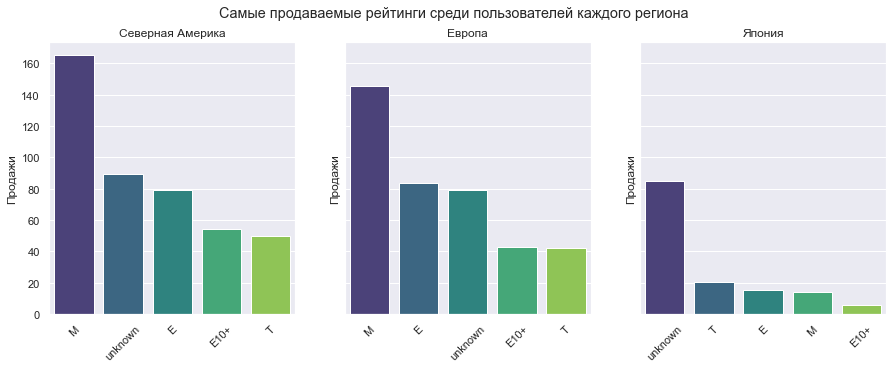

In [43]:
ax = {'na_sales':0,'eu_sales':1, 'jp_sales':2}
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Самые продаваемые рейтинги среди пользователей каждого региона')
title = {'na_sales':'Северная Америка','eu_sales':'Европа', 'jp_sales':'Япония'}
for sales in ['na_sales','eu_sales','jp_sales']:
    g_region = games.pivot_table(index='rating',
               values = sales, 
               aggfunc=('sum')).sort_values(by=sales, ascending=False).reset_index().head()
    sns.barplot(ax=axes[ax[sales]], data=g_region, x='rating', y=sales, palette = 'viridis')
    axes[ax[sales]].set(title = title[sales], ylabel = 'Продажи', xlabel = None)
    axes[ax[sales]].set_xticklabels(axes[ax[sales]].get_xticklabels(),rotation = 45);

Теперь, выявив топ-5 наиболее популярных рейтингов, определим долю игр с этими рейтингами в соотношении друг с другом и иными рейтингами, не попавшими в топ.

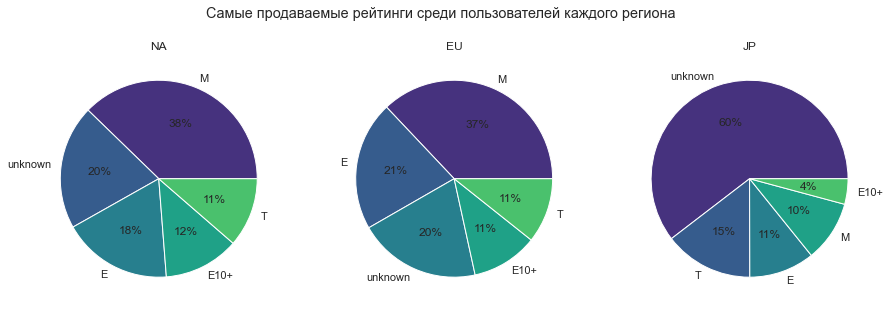

In [44]:
regions = games.columns[4:7]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Самые продаваемые рейтинги среди пользователей каждого региона')
for i in range(3):
    colors = sns.color_palette('viridis')
    g_region = (games.groupby('rating')[regions[i]].sum().
                reset_index().
                sort_values(regions[i], ascending = False, ignore_index=True).
               head(5))

    plt.axes(axes[i])
    plt.pie(data=g_region, x=g_region[regions[i]], labels = 'rating', colors = colors, autopct='%.0f%%')
    axes[i].set_title(g_region.columns[1].split('_')[0].upper())
plt.show()

__Вывод__

Выводы мы будем делать с учетом того, что ESRB - система оценок, принятая в США и Канаде. В различных странах/регионах могут быть приняты свои системы оценок с иной возрастной градацией, в нашем случае:  в Японии - это CERO, в Европе - PEGI. 

В зависимости от возрастного рейтинга пользователи из Северной Америки и Европы предпочитают игры рейтинга `Mature`(«Mature» — «Для взрослых»:старше 17 лет.) В указанных регионах игры для взрослых занимают 38% и 37% игрового рынка соответственно.

На втором месте в Северной Америке игры без рейтинга - пятая часть всех игр. Возможно, это зарубежные игры, рейтинг которым присвоен в соответствии с иной системой. На третьей позиции - `E` ((«Everyone») — «Для всех»).  

В Европе обратная ситуация: вторые по популярности игры с рейтингом `E` ((«Everyone») — «Для всех»), а третье место занимают игры без рейтинга - те же 20%.

В Японии игры без рейтинга занимают первой место, что опять же объясняется разными системами присвоения рейтингов и тем, что в совокупности Северная Америка и Европа производят больше игр, чем Япония.

В целом, в Японии более молодая аудитория - второе место среди рейтингов `T`((«Teen») — «Подросткам»: Игра подходит для лиц от 13 лет). На третьем месте - `E`.



## Проверка гипотез<a id='fifth_step'></a>

Проверим гипотезы о равенстве средних пользовательских рейтингов для различных платформ и жанров.

Пороговое значение alpha зададим равным 0.05. Для проверки гипотез мы будем использовать t-тест, и учтем, что выборки не равны, указав equal_var = False.

Так как выборки независимы, применим метод st.ttest_ind.
Сформулируем двусторонние гипотезы, так как нашей целью не является проверка превшения выручки одного тарифа над другим.


__Первая гипотеза:__   
Нулевая гипотеза: _Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC._  
Альтренативная гипотеза: _Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC._  

In [45]:
data1 = df[df['platform'] == 'XOne']['user_score'].notna()
data2  = df[df['platform'] == 'PC']['user_score'].notna()

alpha = .05 

results = st.ttest_ind(
    data1, 
    data2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09405152812899362
Не получилось отвергнуть нулевую гипотезу


In [46]:
print('Средний пользовательский рейтинг платформы XOne:', df[df['platform'] == 'XOne']['user_score'].notna().mean())
print('Средний пользовательский рейтинг платформы PC:', df[df['platform'] == 'PC']['user_score'].notna().mean())

Средний пользовательский рейтинг платформы XOne: 0.7368421052631579
Средний пользовательский рейтинг платформы PC: 0.7889237199582028


__Вывод__

Мы не смогли отвергнуть первую нулевую гипотезу. При этом p-value равен 0.09 - это значит, что, даже если средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC, получение такой разницы с вероятностью 9% будет случайностью.


__Вторая гипотеза:__   
Нулевая гипотеза: _Средний пользовательский рейтинг жанра Action (англ. «действие», экшен-игры) равен среднему пользовательскому рейтингу жанра Sports (англ. «спортивные соревнования»)._     
Альтренативная гипотеза: _Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports._



In [47]:
data1 = df[df['genre'] == 'Action']['user_score'].notna()
data2  = df[df['genre'] == 'Sports']['user_score'].notna()

alpha = .05 

results = st.ttest_ind(
    data1, 
    data2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.9034188935295115e-08
Отвергаем нулевую гипотезу


In [48]:
print('Средний пользовательский рейтинг жанра Экшн:', df[df['genre'] == 'Action']['user_score'].notna().mean())
print('Средний пользовательский рейтинг жанра Спорт:', df[df['genre'] == 'Sports']['user_score'].notna().mean())

Средний пользовательский рейтинг жанра Экшн: 0.543254688445251
Средний пользовательский рейтинг жанра Спорт: 0.46877710320901994


__Вывод__

Мы отвергли вторую нулевую гипотезу. Из доступных нам данных следует, что средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

## Итоги исследования  <a id='sixth_step'></a>

Мы исследовали определяющие успешность игры закономерности для в интернет-магазина «Стримчик».

В ходе исследования мы:

1. Исправили типы данных;  избавились от пропусков; рассчитали суммарные продажи по всем регионам; избавились от неявных дубликатов. Также мы избавились от аномалий и выбросов.

2. Определили, что после подъема продаж в 00-х, второе десятилетие 21-го века ознаменовалось спадом продаж практически до уровня 90-х гг. Это может быть связано с ростом популярности мобильных игр и пиратством. С учетом спада игровой индустрии во втором десятилетии 21 века, в качестве актуального времени мы взяли отрезок времени с 2013 до 2016 годов. За  указанный период только две платформы - PS4 и XOne - показали рост продаж. Высокие продажи на топе платформ были обеспечены:
- 2014 год: играми GTA V, Call of Duty: Advanced Warfare, FIFA 15.
- 2015 год: Call of Duty: Black Ops 3, FIFA 16, Star Wars Battlefront (2015).
- 2016 год: FIFA 17, Uncharted 4: A Thief's End. 
- Жанры: Shooter, Action и Sports.

3. Выявили, что в актуальный для исследования период лидером по медианному количеству продаж, в том числе среди бестселлеров, является платформа `PS3`. Также стабильные высокие продажи  показывают платформы `PS4` и `X360`. Между тем, лидеры по медианам и третьим квартилям продаж - это `X360`, `PS4`, `XOne` и `WiiU`. Указанные платформы стабильно приносят высокий доход.

4. Рассчитали корреляцию между глобальными продажами и оценками критиков и пользователей. Выяснили, что между глобальными продажами и оценкой критиков имеется умеренная положительная корреляция. Между продажами и оценкой пользователей корреляция отсутствует. При этом отметили высокую корреляцию между оценкой критиков и оценкой пользователей.

5. Определили, что среди жанров наибольшей популярностью - с превосходящими конкурентов пиком продаж - пользуется жанр `Action`, успех которого обеспечен бестселлером `GTA V`. Второе и третье места по продажам занимают жанры `Shooter` и `Role-Playing`. `Shooter`, в числе прочего, является наиболее стабильным по продажам жанром - этот жанр имеет наиболее высокие показатели медианы и третьего квартиля продаж. Наименьшим спросом и стабильностью пользуются жанры `Adventure` и `Puzzle` - являющиеся цифровыми аналогами настольных игр, вновь набирающих популярность и оттого вытесняющих цифрового соперника.

6. Сделали расчет влияющих на продажи показателей для каждого региона:

> - Лидером продаж среди платформ в Северной Америке и Европе (с большим отрывом) является `PS4` - 25% в Америке и 36% в Европе. Япония отдает предпочтение стабильному `3DS` - также с большим отрывом 48%. Дальнейшее распределение популярности платформ между регионами различается. В Америке популярны `XOne` и `X360` - 21% и 19% соответственно. В Европе спросом пользуются `PS3` и `XOne` - 17% и 13% соответственно. В Японии популярны `PS3` и `PSV`- 17% и 13% соответственно.

> - В Северной Америке и Европе тройка наиболее популярных жанров совпадают - это `Action` (29-20%), `Shooter`(22-25%) и `Sports`(15%). Как мы видим, один из наиболее прибыльных жанров `Role-Playing` вытеснил более стабильный по продажам `Sports`, оттеснив РПГ на 4 место. Топ-5 жанров Японии не отражает общемировую тенденцию, тройка лидеров здесь `Role-Playing`, `Action`, `Misc`. Шутеры замыкают топ.

> - В отношении возрастного рейтинга мы учли, что ESRB - система оценок, принятая в США и Канаде. В различных странах/регионах могут быть приняты свои системы оценок с иной возрастной градацией, в нашем случае:  в Японии - это CERO, в Европе - PEGI.  

> - В зависимости от возрастного рейтинга пользователи из Северной Америки и Европы предпочитают игры рейтинга `Mature`(«Mature» — «Для взрослых»:старше 17 лет.) В указанных регионах игры для взрослых занимают 38% и 37% игрового рынка соответственно. На втором месте в Северной Америке игры без рейтинга - пятая часть всех игр. Возможно, это зарубежные игры, рейтинг которым присвоен в соответствии с иной системой. На третьей позиции - `E` ((«Everyone») — «Для всех»).  

> - В Европе обратная ситуация: вторые по популярности игры с рейтингом `E` ((«Everyone») — «Для всех»), а третье место занимают игры без рейтинга - те же 20%.

> - В Японии игры без рейтинга занимают первой место, что опять же объясняется разными системами присвоения рейтингов и тем, что в совокупности Северная Америка и Европа производят больше игр, чем Япония. В целом, в Японии более молодая аудитория - второе место среди рейтингов `T`((«Teen») — «Подросткам»: Игра подходит для лиц от 13 лет). На третьем месте - `E`.

Рассчитав продажи в разбивке по платформам и жанрам, мы проверили две гипотезы о равенстве средних пользовательских рейтингов:

- Мы не смогли отвергнуть первую нулевую гипотезу, о том, что средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC. При этом p-value равен 0.09 - это значит, что, даже если средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC, получение такой разницы с вероятностью 9% будет случайностью.
- Мы отвергли вторую нулевую гипотезу, о том, что средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports. Из доступных нам данных следует, что средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

__На основе имеющихся данных мы можем сделать составить портрет игры, которая если и не получит всплеск пользовательского интереса, то точно принесет стабильные продажи:__

__- Для Северной Америки и Европы - игра в жанре Action или Shooter на платформе PS4 с возрастным рейтингом М.__

__- Для Японии - игра в жанре Role-Playing или Action на платформе 3DS с возрастным рейтингом Т.__
